<a href="https://colab.research.google.com/github/victoriapaganotto/Desafio-Final-ShePY/blob/main/Aula_10_ShePY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução à Visão Computacional 

### Entendendo os conceitos de imagem e padrão RGB

Uma imagem pode ser representada como um array de números/matriz. Cada célula dessa matriz é um **pixel** (menor unidade de informação que compõe uma imagem digital), que no caso de uma imagem preto e branca possui um valor de 0 a 255, sendo 0 para preto e 255 para branco.
O *range* ou intervalo varia de 0 a 255 e tem relação com os computadores que guardam os números. Salienta-se que você pode dividir os valores por 255 para normalizar os valores entre 0 e 1.
Em uma imagem preta e branca temos apenas um canal, ou seja, uma matriz de 2 dimensões.

Já uma imagem colorida, por exemplo, é composta por uma matriz de 3 dimensões (3 canais) que possuem em cada canal, uma das cores do padrão **RGB**.

* **RED** - Vermelho;
* **GREEN** - Verde;
* **BLUE** - Azul.

Ou seja, em imagens coloridas, temos uma matriz formada por três matrizes de duas dimensões, cada uma representando uma das cores do sistema RGB. Isso permite a produção de uma variedade de cores. Portanto, no sistema RGB temos por exemplo.

* Branco: RGB (255, 255, 255);
* Azul: RGB (0, 0, 255);
* Vermelho: RGB (255, 0, 0);
* Verde: RGB (0, 255, 0);
* Preto: RGB (0, 0, 0).

**Observação:** em programação, um array é uma estrutura de dados que armazena uma coleção de elementos de tal forma que cada um dos elementos possa ser identificado por um índice.

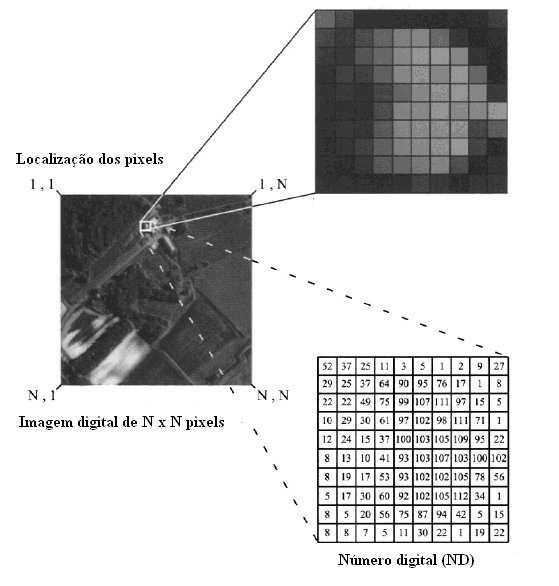

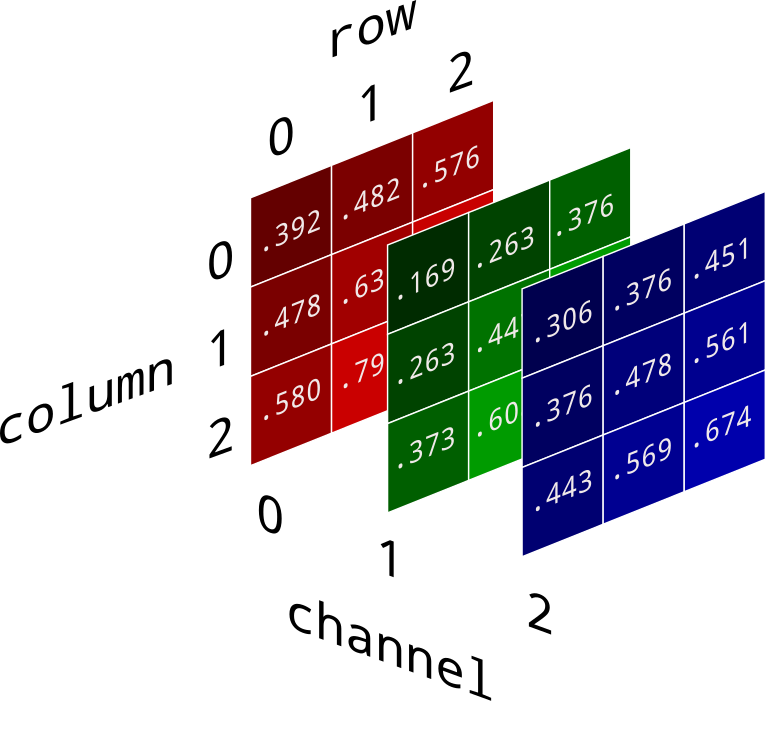

## O que é visão computacional?

Dar capacidade de "enxergar" á uma máquina.

### Problemas de interesse da visão computacional:

* Detecção: Encontrar um determinado objeto dentro de uma imagem.
* Reconhecimento: Além de detectar, reconhecer uma coisa como algo que já se reconhece. Exemplo: reconhecinhecimento facial.
* Segmentação: Poder separar uma imagem de uma determinada coisa. Exemplo: separação de fundo da imagem.
* Análise de movimento: Reconhecer se algo está parado ou não.
* Reconstruição 3D: Estimar algo em formato 3D.

In [2]:
import cv2 # opencv Importado como cv2
from google.colab.patches import cv2_imshow 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
blank_ing = np.zeros(shape=(501, 501, 3), dtype=np.int16)

In [4]:
blank_ing.ndim # Para visualizar que possuimos 3 dimensões

3

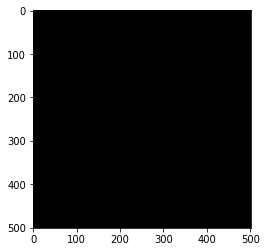

In [5]:
plt.imshow(blank_ing) 

In [7]:
type(blank_ing)

numpy.ndarray

In [8]:
blank_ing.fill(255)

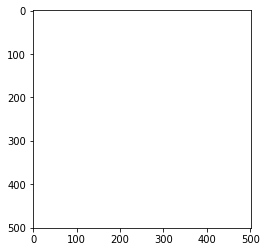

In [10]:
plt.imshow(blank_ing)

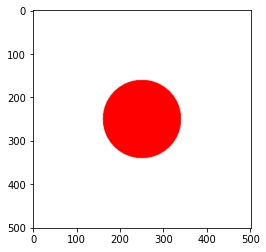

In [14]:
# Desenhando algo similiar à bandeira do Japão
cv2.circle(blank_ing, center=(250, 250), radius=90, color=(255, 0, 0), thickness=-1)
plt.imshow(blank_ing)

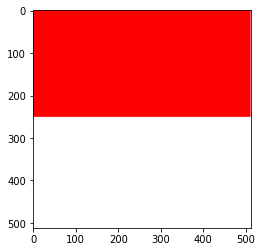

In [16]:
# Desenhando algo similar à bandeira da Indonésia 
# pt1: representar as posições do ponto do topo esquerdo do retângulo.
# pt2: representar as posições do ponto do canto direito do retângulo.

bandeira = np.zeros(shape=(512, 512, 3), dtype=np.int16)
bandeira.fill(255)

cv2.rectangle(bandeira, pt1=(0,0), pt2=(510, 250), color=(255, 0, 0), thickness=-1)
plt.imshow(bandeira)

## Lendo arquivos de imagem:

In [17]:
img = cv2.imread('friends.jpg')

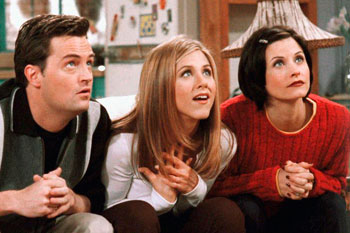

In [18]:
cv2_imshow(img)

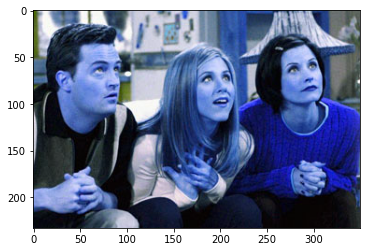

In [19]:
plt.imshow(img) # Imagem gerada com o matplotlib 

A imagem está em tom azulado, porque o openCV e o matplotlib esperam diferentes ordens do canal RGB.



*   O **matplotlib** lê na ordem RGB (Red, Green, Blue);
*   O **openCV** lê na ordem BGR (Blue, Green, Red). Assim é necessário transformar para um modo que o matplotlib espera.



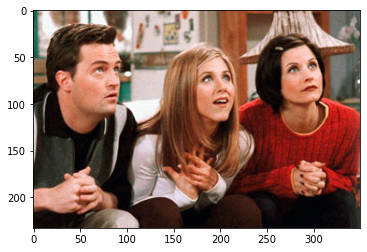

In [43]:
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)

In [44]:
fix_img.shape

(233, 350, 3)

In [46]:
gray = cv2.cvtColor(fix_img, cv2.COLOR_RGB2GRAY)

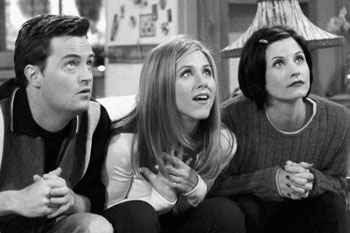

In [48]:
cv2_imshow(gray)

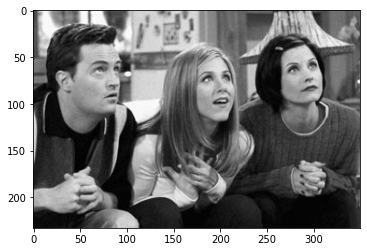

In [49]:
plt.imshow(gray, cmap='gray')

In [50]:
gray.shape

(233, 350)

In [51]:
gray.ndim

2

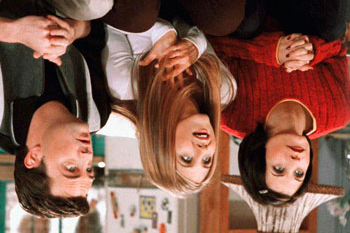

In [53]:
# Invertendo a imagem
flip_img = cv2.flip(img, 0) # Observar o comando flit
cv2_imshow(flip_img) 

In [55]:
# Salvando a imagem virada!
cv2.imwrite('flip_img.jpg', flip_img)

True

## Introdução a detecção de objetos

#### Template Matching:

Simplesmente verifica uma imagem maior para um modelo fornecido, deslizando a imagem de destino do modelo pela imagem maior.

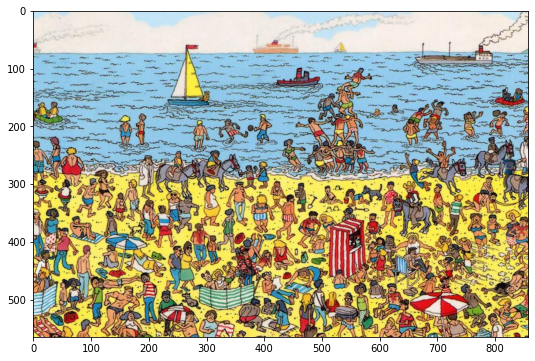

In [26]:
plt.figure(figsize=(10, 6)) #Altera a demonstração no notebook

full = cv2.imread('wally.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

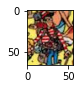

In [30]:
plt.figure(figsize=(2,1))
face = cv2.imread('wallyfound.png')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

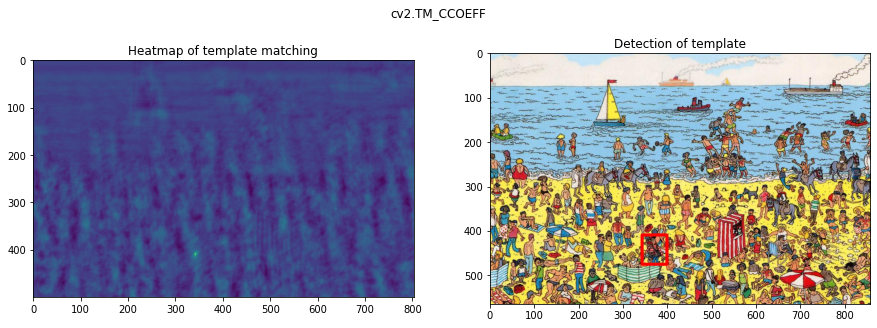

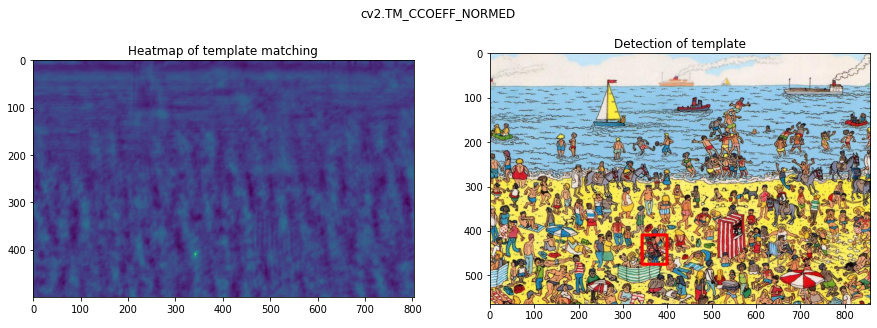

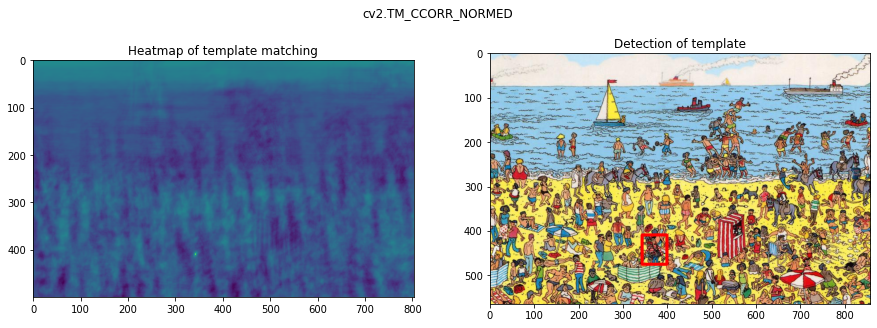

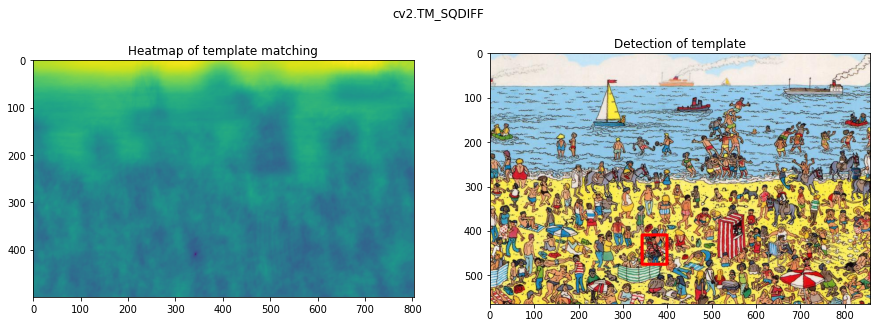

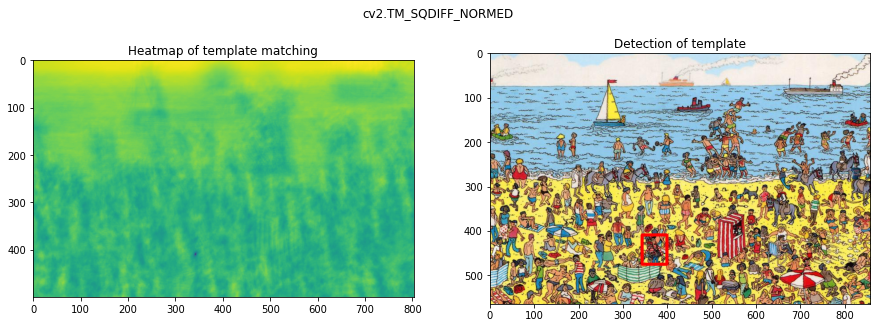

In [42]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for m in methods:
  # Criar uma cópia
  full_copy = full.copy()
  method = eval(m)

  # Template matching
  res = cv2.matchTemplate(full_copy, face, method)

  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) # Para encontrar os valores máximo e mínimo (bem como suas posições) em uma determinada matriz.
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  height, width, channels = face.shape

  bottom_right = (top_left[0]+width, top_left[1]+height)

  cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), thickness=5)

  # Plotar as imagens
  plt.figure(figsize=(15, 5))
  plt.subplot(121)
  plt.imshow(res)
  plt.title('Heatmap of template matching')  

  plt.subplot(122)
  plt.imshow(full_copy)
  plt.title('Detection of template')
  plt.suptitle(m)

  plt.show()

